In [1]:
from vision.ssd.mobilenet_v2_ssd_lite import create_mobilenetv2_ssd_lite, create_mobilenetv2_ssd_lite_predictor
from vision.utils.misc import Timer
import matplotlib.pyplot as plt
import cv2
import sys
import numpy as np
import pathlib

ModuleNotFoundError: No module named 'vision'

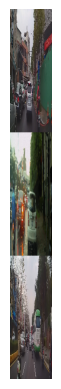

In [32]:
%matplotlib inline


def vconcat_resize(img_list, interpolation  
                   = cv2.INTER_CUBIC): 
    #centerCrop
    center = img_list[0].shape
    h = 540
    w = 1620
    bias = 50
    x = center[1]/2 - w/2
    y = center[0]/2 - h/2 + bias
    h += bias

    im_list_Crop_Resize = [cv2.resize(img[int(y):int(y+h), int(x):int(x+w)],
                                      (300,100), interpolation = interpolation) 
                      for img in img_list] 

    
    # return final image 
    return cv2.vconcat(im_list_Crop_Resize) 
  
img1 = cv2.imread("../Data/test/images/Cityscape_02.mp4_02985.jpg")
img2 = cv2.imread("../Data/test/images/Rainy_02.mp4_08555.jpg")
img3 = cv2.imread("../Data/test/images/Cityscape_02.mp4_01229.jpg")
# function calling 
img_v_resize = vconcat_resize([img1, img2, img3]) 
  
img_v = cv2.cvtColor(img_v_resize, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img_v)
plt.show()

Loading Trained Model is Done!

Starting Detection...

Time: 0.03s, Detect Objects: 9.
(300, 300, 3)


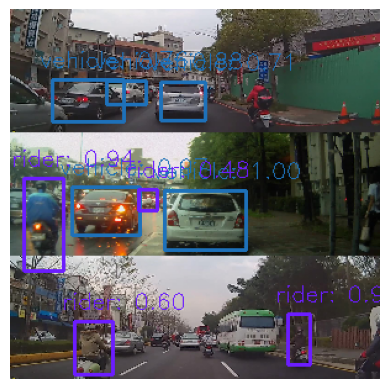

In [31]:
if __name__ == "__main__":

    timer = Timer()
    label_path = "models/ubi-model-labels.txt"
    model_path = "models/best.pth"
    # --------------- #

    class_names = [name.strip() for name in open(label_path).readlines()]

    net = create_mobilenetv2_ssd_lite(
        len(class_names), is_test=True, device='cpu')


    net.load(model_path)

    predictor = create_mobilenetv2_ssd_lite_predictor(
        net, candidate_size=200)


    print("Loading Trained Model is Done!\n")
    print("Starting Detection...\n")

    orig_image = img_v
    image = img_v
    color = np.random.uniform(0, 255, size=(len(class_names), 3))

    timer.start()
    boxes, labels, probs = predictor.predict(img_v, 5, 0.45)
    interval = timer.end()
    print('Time: {:.2f}s, Detect Objects: {:d}.'.format(
        interval, labels.size(0)))

    fps = 1/interval

    for i in range(boxes.size(0)):
        box = boxes[i, :]
        label = f"{class_names[labels[i]]}: {probs[i]:.2f}"

        i_color = int(labels[i])
        box = [round(b.item()) for b in box]

        cv2.rectangle(orig_image, (box[0], box[1]),
                      (box[2], box[3]), color[i_color], 2)

        cv2.putText(orig_image, label,
                    (box[0] - 10, box[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6,  # font scale
                    color[i_color],
                    1)  # line type

    print(orig_image.shape)
    plt.axis('off')
    plt.imshow(orig_image)
    plt.show()